In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [4]:
def E_(E, th):
    return E/(1+(E/0.511)*(1-math.cos(th)))

In [5]:
def Ee(E1, E2):
    return E1-E2

In [6]:
print(E_(1.120287, math.pi))    
print(Ee(1.120287, E_(1.120287, math.pi)))

0.20805061284922738
0.9122363871507726


In [7]:
print(E_(1.46083, math.pi))    
print(Ee(1.46083, E_(1.46083, math.pi)))

0.217465210652963
1.243364789347037


In [8]:
print(E_(1.173, math.pi))    
print(Ee(1.173, E_(1.173, math.pi)))

0.20980154007700386
0.9631984599229961


In [29]:
print(E_(1.333, math.pi))    
print(Ee(1.333, E_(1.333, math.pi)))

0.2144044696254328
1.1185955303745672


In [9]:
#Pico de Retrodifusão
print(f"Pico de Retrodifusão: {E_(0.662, math.pi)} MeV")
print(f"Joelho de Compton: {Ee(0.662, E_(0.662, math.pi))} MeV")


Pico de Retrodifusão: 0.184349863760218 MeV
Joelho de Compton: 0.47765013623978203 MeV


In [10]:
print(f"Pico de Retrodifusão 1: {E_(1.173, math.pi)} MeV")
print(f"Joelho de Compton 1: {Ee(1.173, E_(1.173, math.pi))} MeV")
print(f"Pico de Retrodifusão 2: {E_(1.333, math.pi)} MeV")
print(f"Joelho de Compton 2: {Ee(1.333, E_(1.333, math.pi))} MeV")

Pico de Retrodifusão 1: 0.20980154007700386 MeV
Joelho de Compton 1: 0.9631984599229961 MeV
Pico de Retrodifusão 2: 0.2144044696254328 MeV
Joelho de Compton 2: 1.1185955303745672 MeV


In [11]:
def calib(c):
    return 2.04*c-15.54

In [12]:
def error(fmhw, roi):
    s = fmhw/2.35
    sm = s/math.sqrt(roi)
    print (sm)

In [13]:
def calib_propagation(centroid, sigma, counts):
    err = sigma/math.sqrt(counts)
    print (math.sqrt(2.04*2.04*err*err + centroid*centroid*0.0000744*0.0000744 + 0.00468*0.00468))


In [14]:
calib_propagation(118.678, 28.0691, 1)
calib_propagation(437.614, 55.1, 1)
calib_propagation(503.3, 46.1714, 1)
calib_propagation(220.46, 17.615, 1)
calib_propagation(105.36, 5.97, 199756)

57.26096487201639
112.40400481280516
94.18966355958442
35.93460404812264
0.028737965451673394


In [15]:
#cobalto
#gamma1
error(24.57, 21094)
#gamma2
error(29.10, 16675)
#cesio
#raio-x
error(2.83, 280327)
#gamma
error(20.16, 518489)

0.07198762130682058
0.09589417019776535
0.0022745008768506464
0.01191387096172673


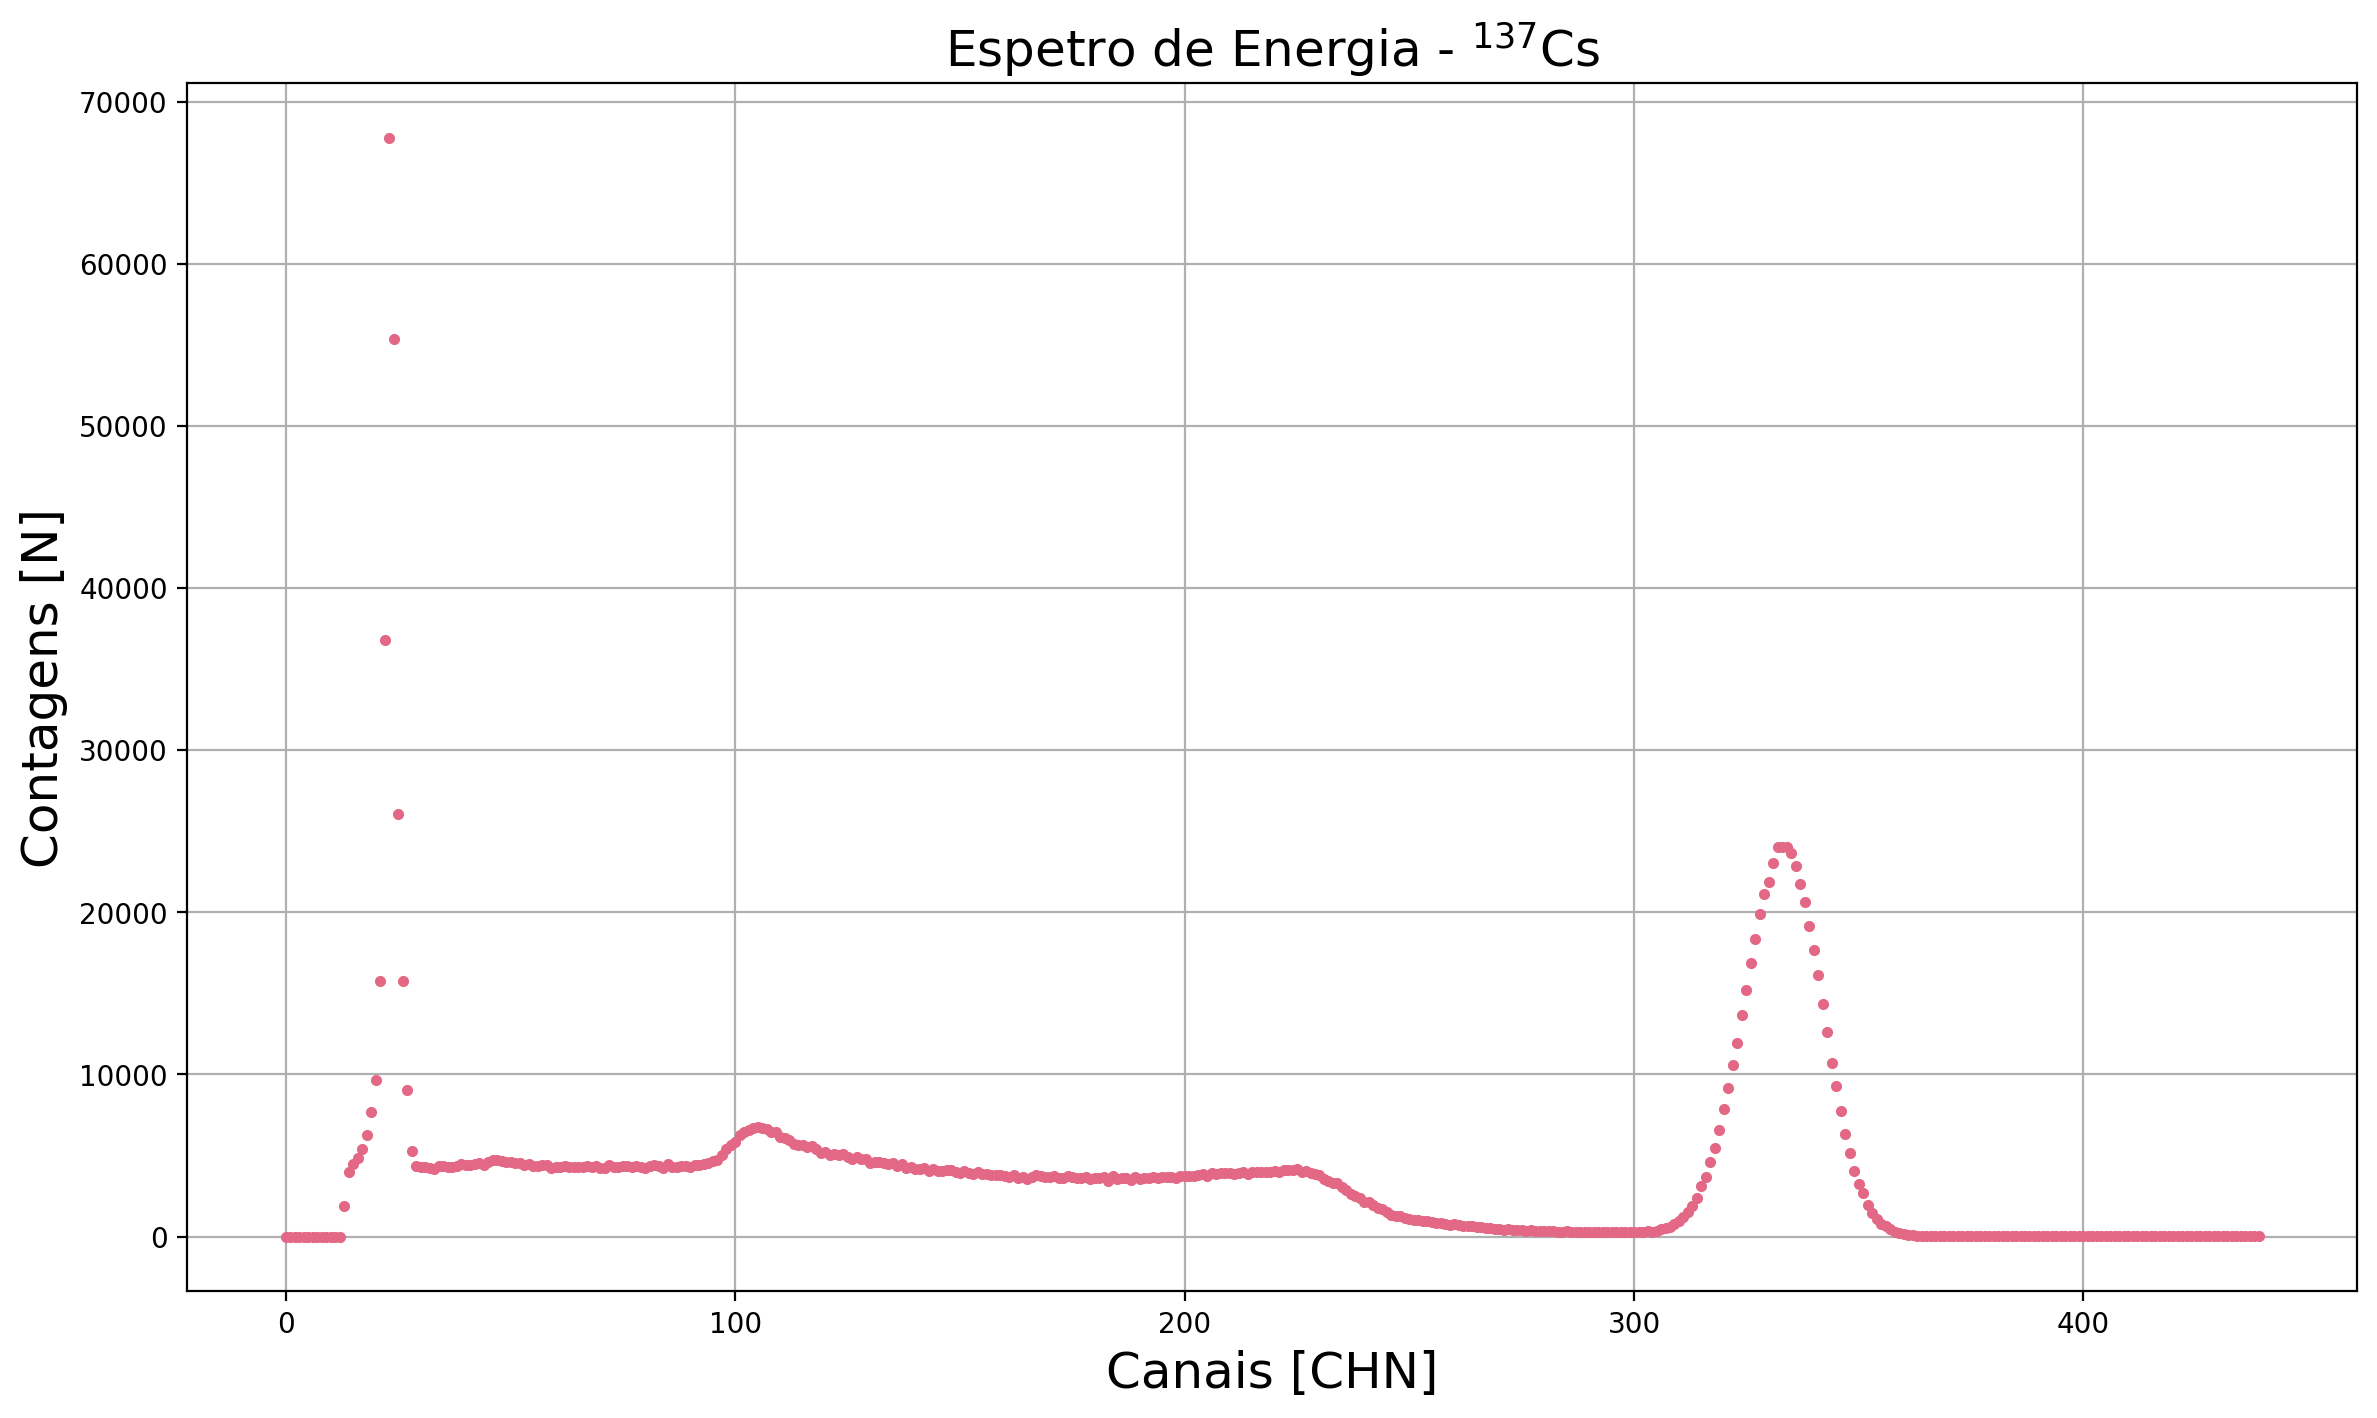

In [16]:
data = pd.read_csv("../g2_cs_comma.txt", index_col=False, header=None, sep=",")
x = data.iloc[0:, 0]
y = data.iloc[0:, 1]
plt.figure(figsize=(14, 8), dpi=200)
plt.plot(x, y, marker='.', c="#e36885", linestyle ='')
plt.title("Espetro de Energia - $^{137}$Cs", fontsize = 18)
plt.xlabel("Canais [CHN]", fontsize = 18)
plt.ylabel("Contagens [N]", fontsize = 18)
plt.grid()
plt.savefig('../cspython.png', facecolor='white', transparent=False, bbox_inches="tight")

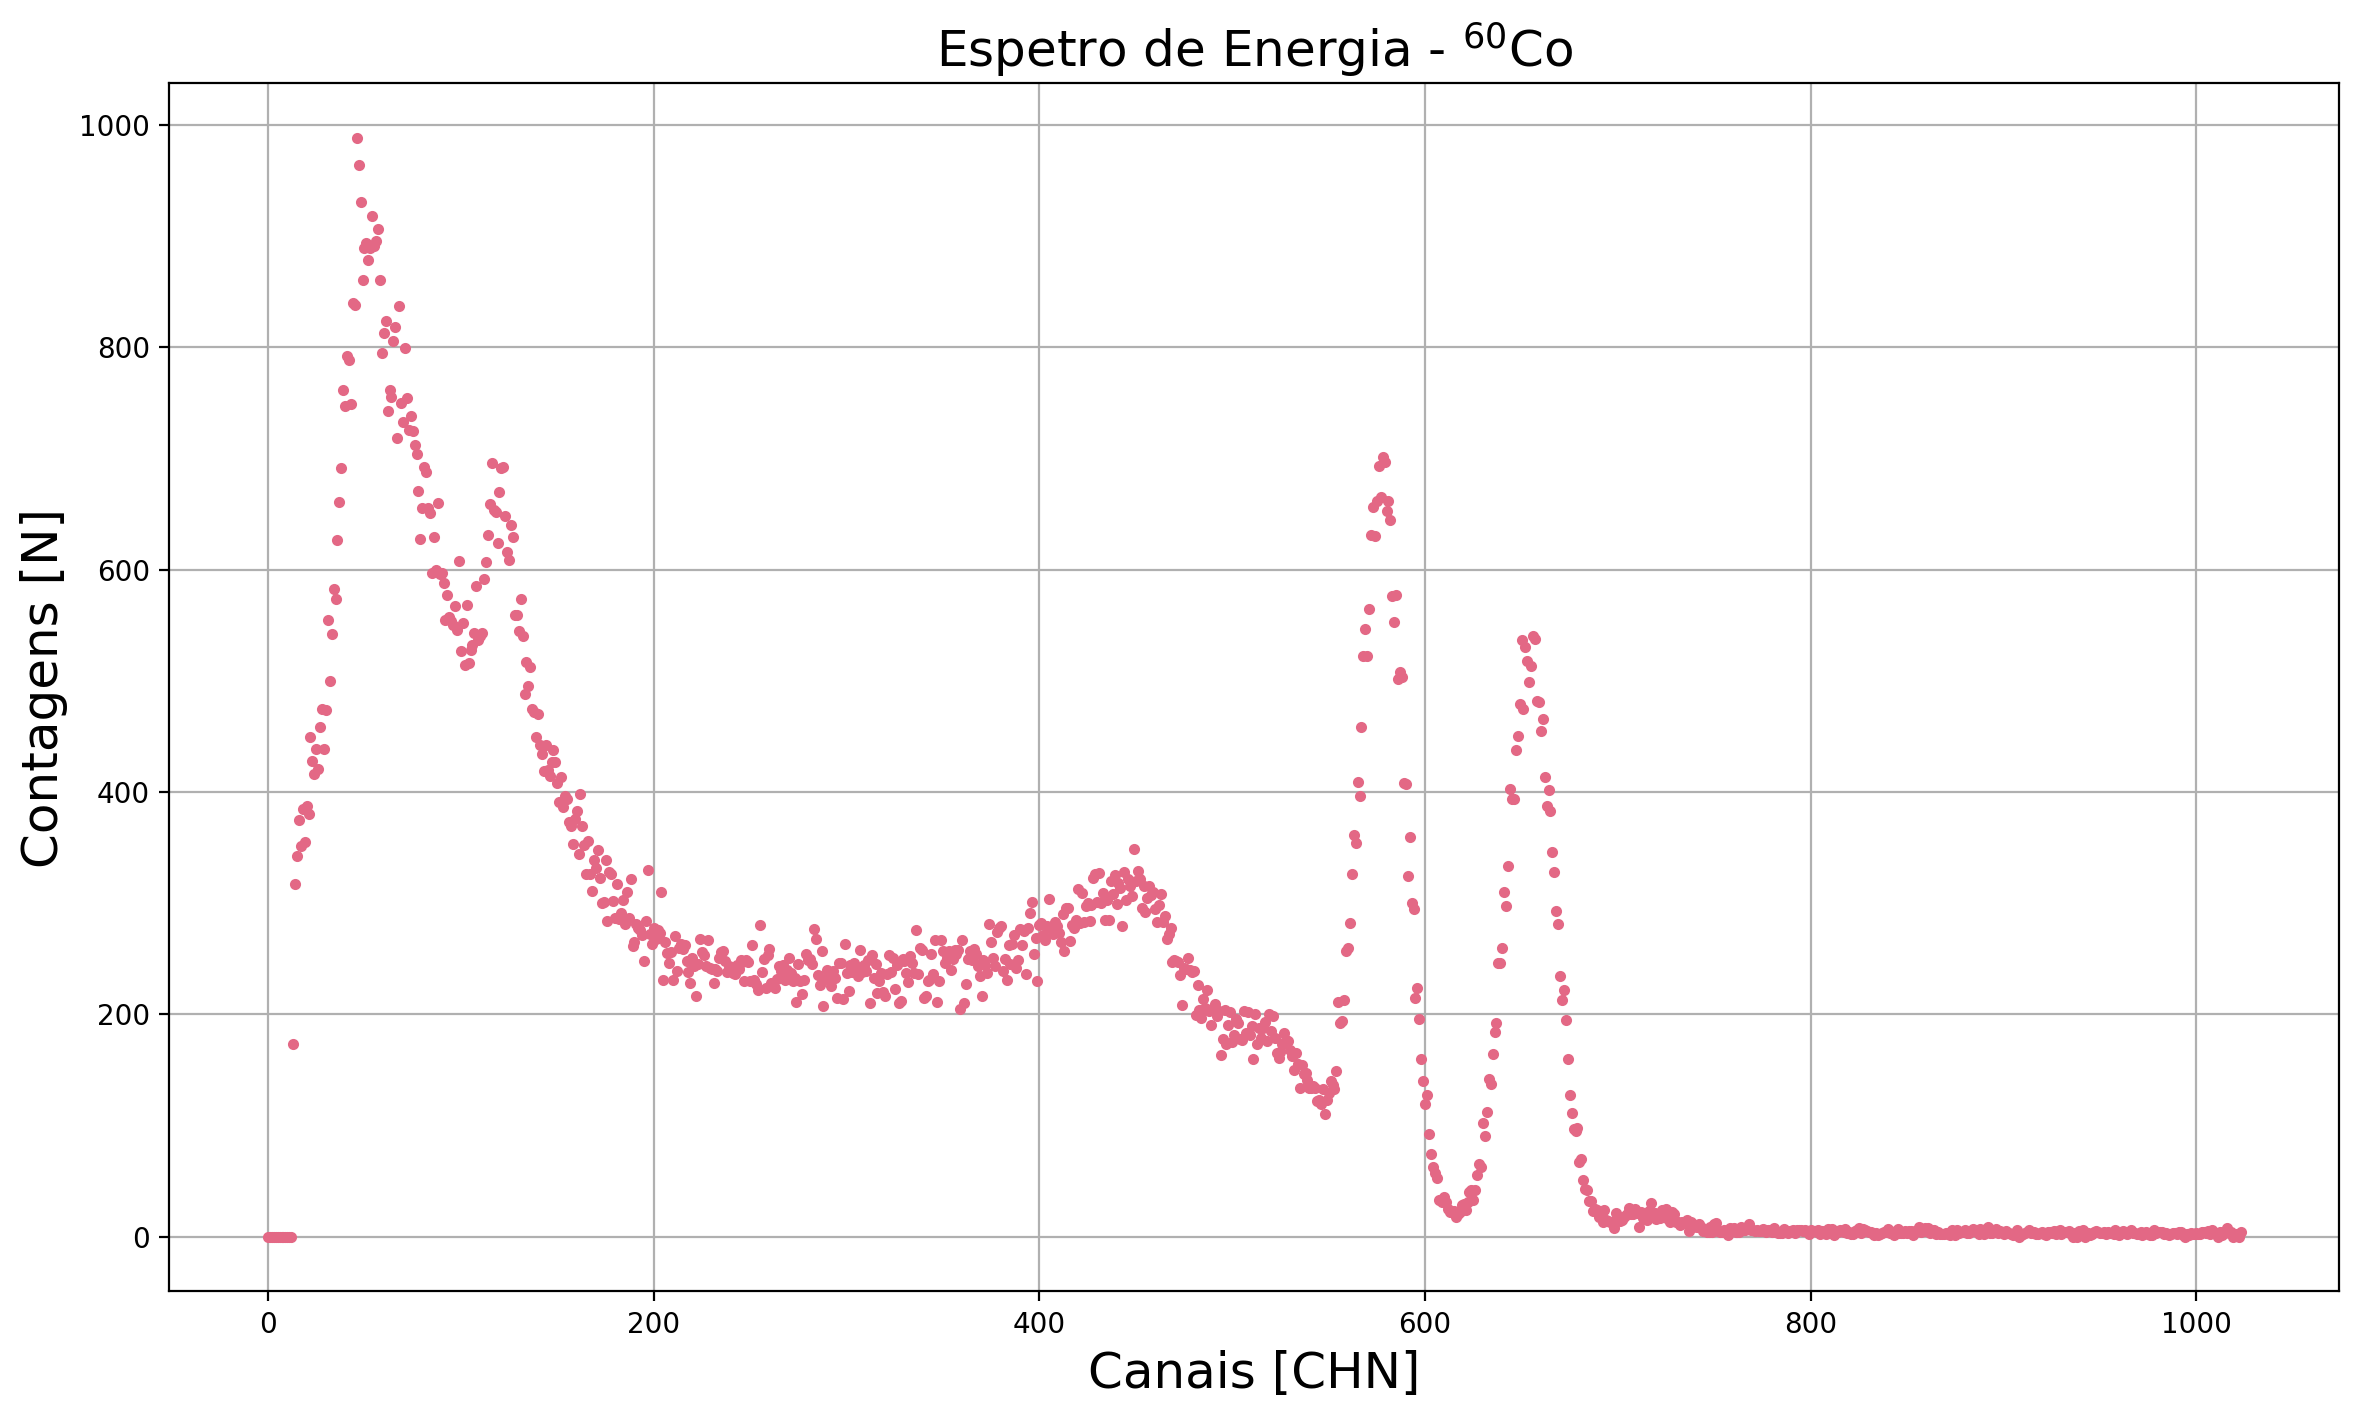

In [17]:
data = pd.read_csv("../g2_co_comma.txt", index_col=False, header=None, sep=",")
x = data.iloc[0:, 0]
y = data.iloc[0:, 1]
plt.figure(figsize=(14, 8), dpi=200)
plt.plot(x, y, marker='.', c="#e36885", linestyle ='')
plt.title("Espetro de Energia - $^{60}$Co", fontsize = 18)


plt.xlabel("Canais [CHN]", fontsize = 18)
plt.ylabel("Contagens [N]", fontsize = 18)
plt.grid()
plt.savefig('../copython.png', facecolor='white', transparent=False, bbox_inches="tight")

In [18]:
def graph(file, title, xaxys, yaxis, save):
    data = pd.read_csv(file, index_col=False, header=None, sep=",")
    x = data.iloc[0:, 0]
    y = data.iloc[0:, 1]
    plt.figure(figsize=(14, 8), dpi=200)
    plt.plot(x, y, marker='.', c="#e36885", linestyle ='')
    plt.title(title, fontsize = 18)
    plt.xlabel(xaxys, fontsize = 18)
    plt.ylabel(yaxis, fontsize = 18)
    plt.grid()
    plt.savefig(save, facecolor='white', transparent=False, bbox_inches="tight")

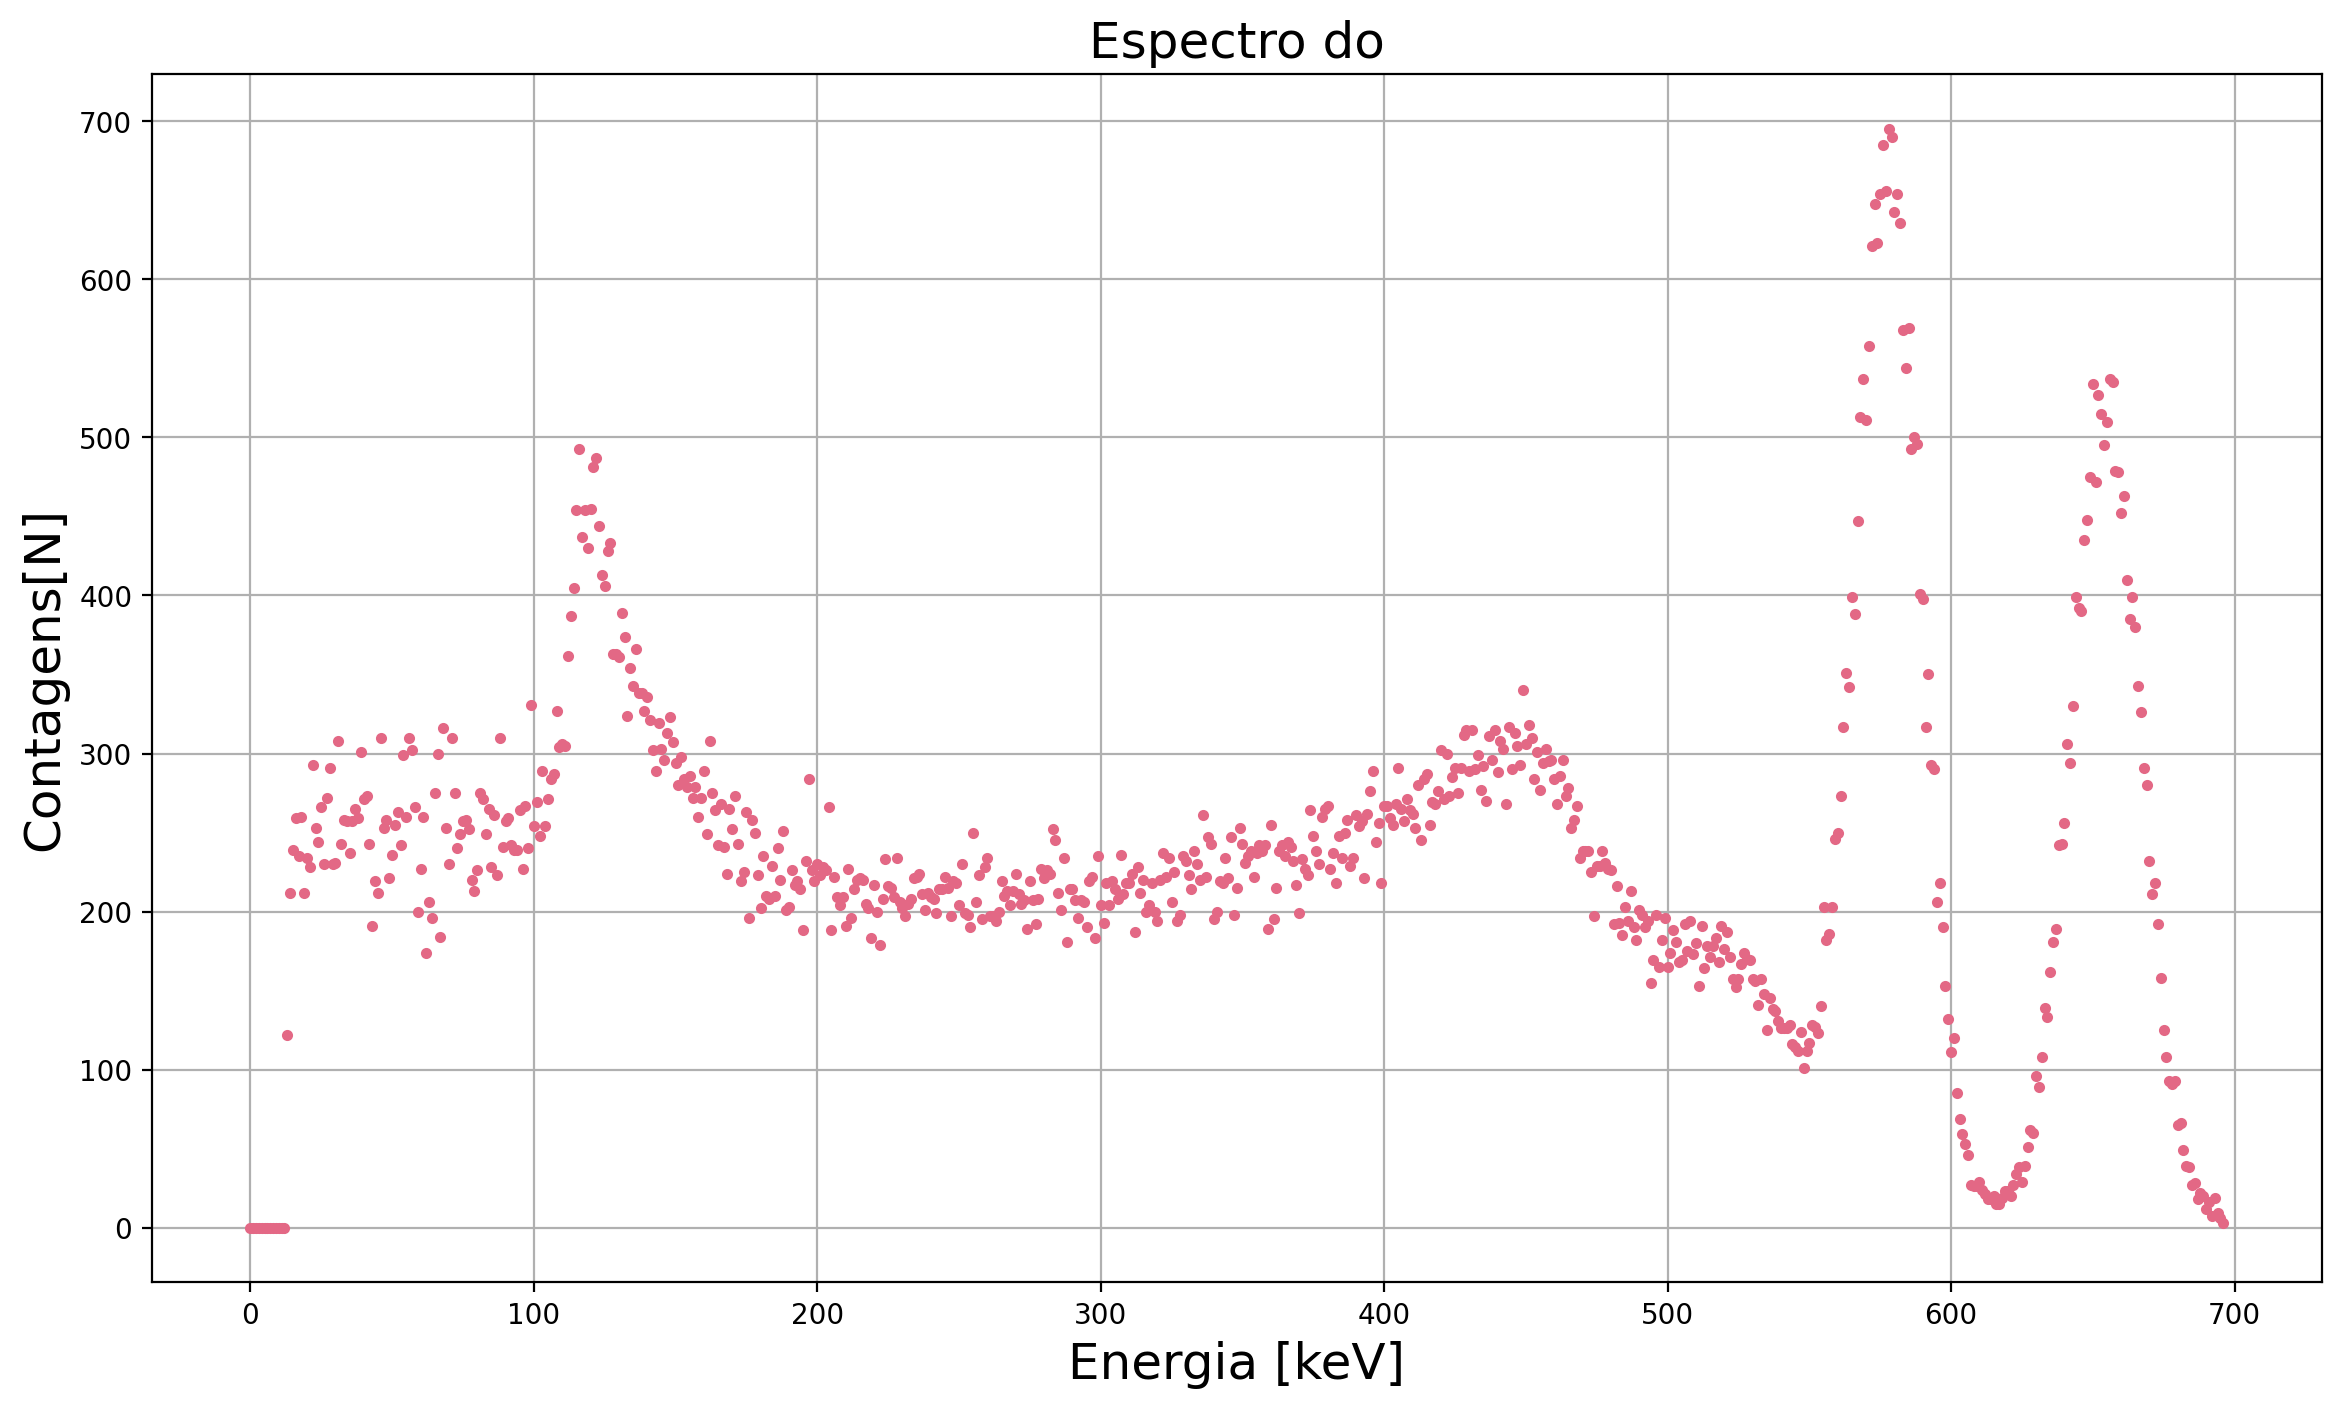

In [19]:
graph("../cosemfundo.txt", "Espectro do", "Energia [keV]","Contagens[N]", "../g2_background.png")

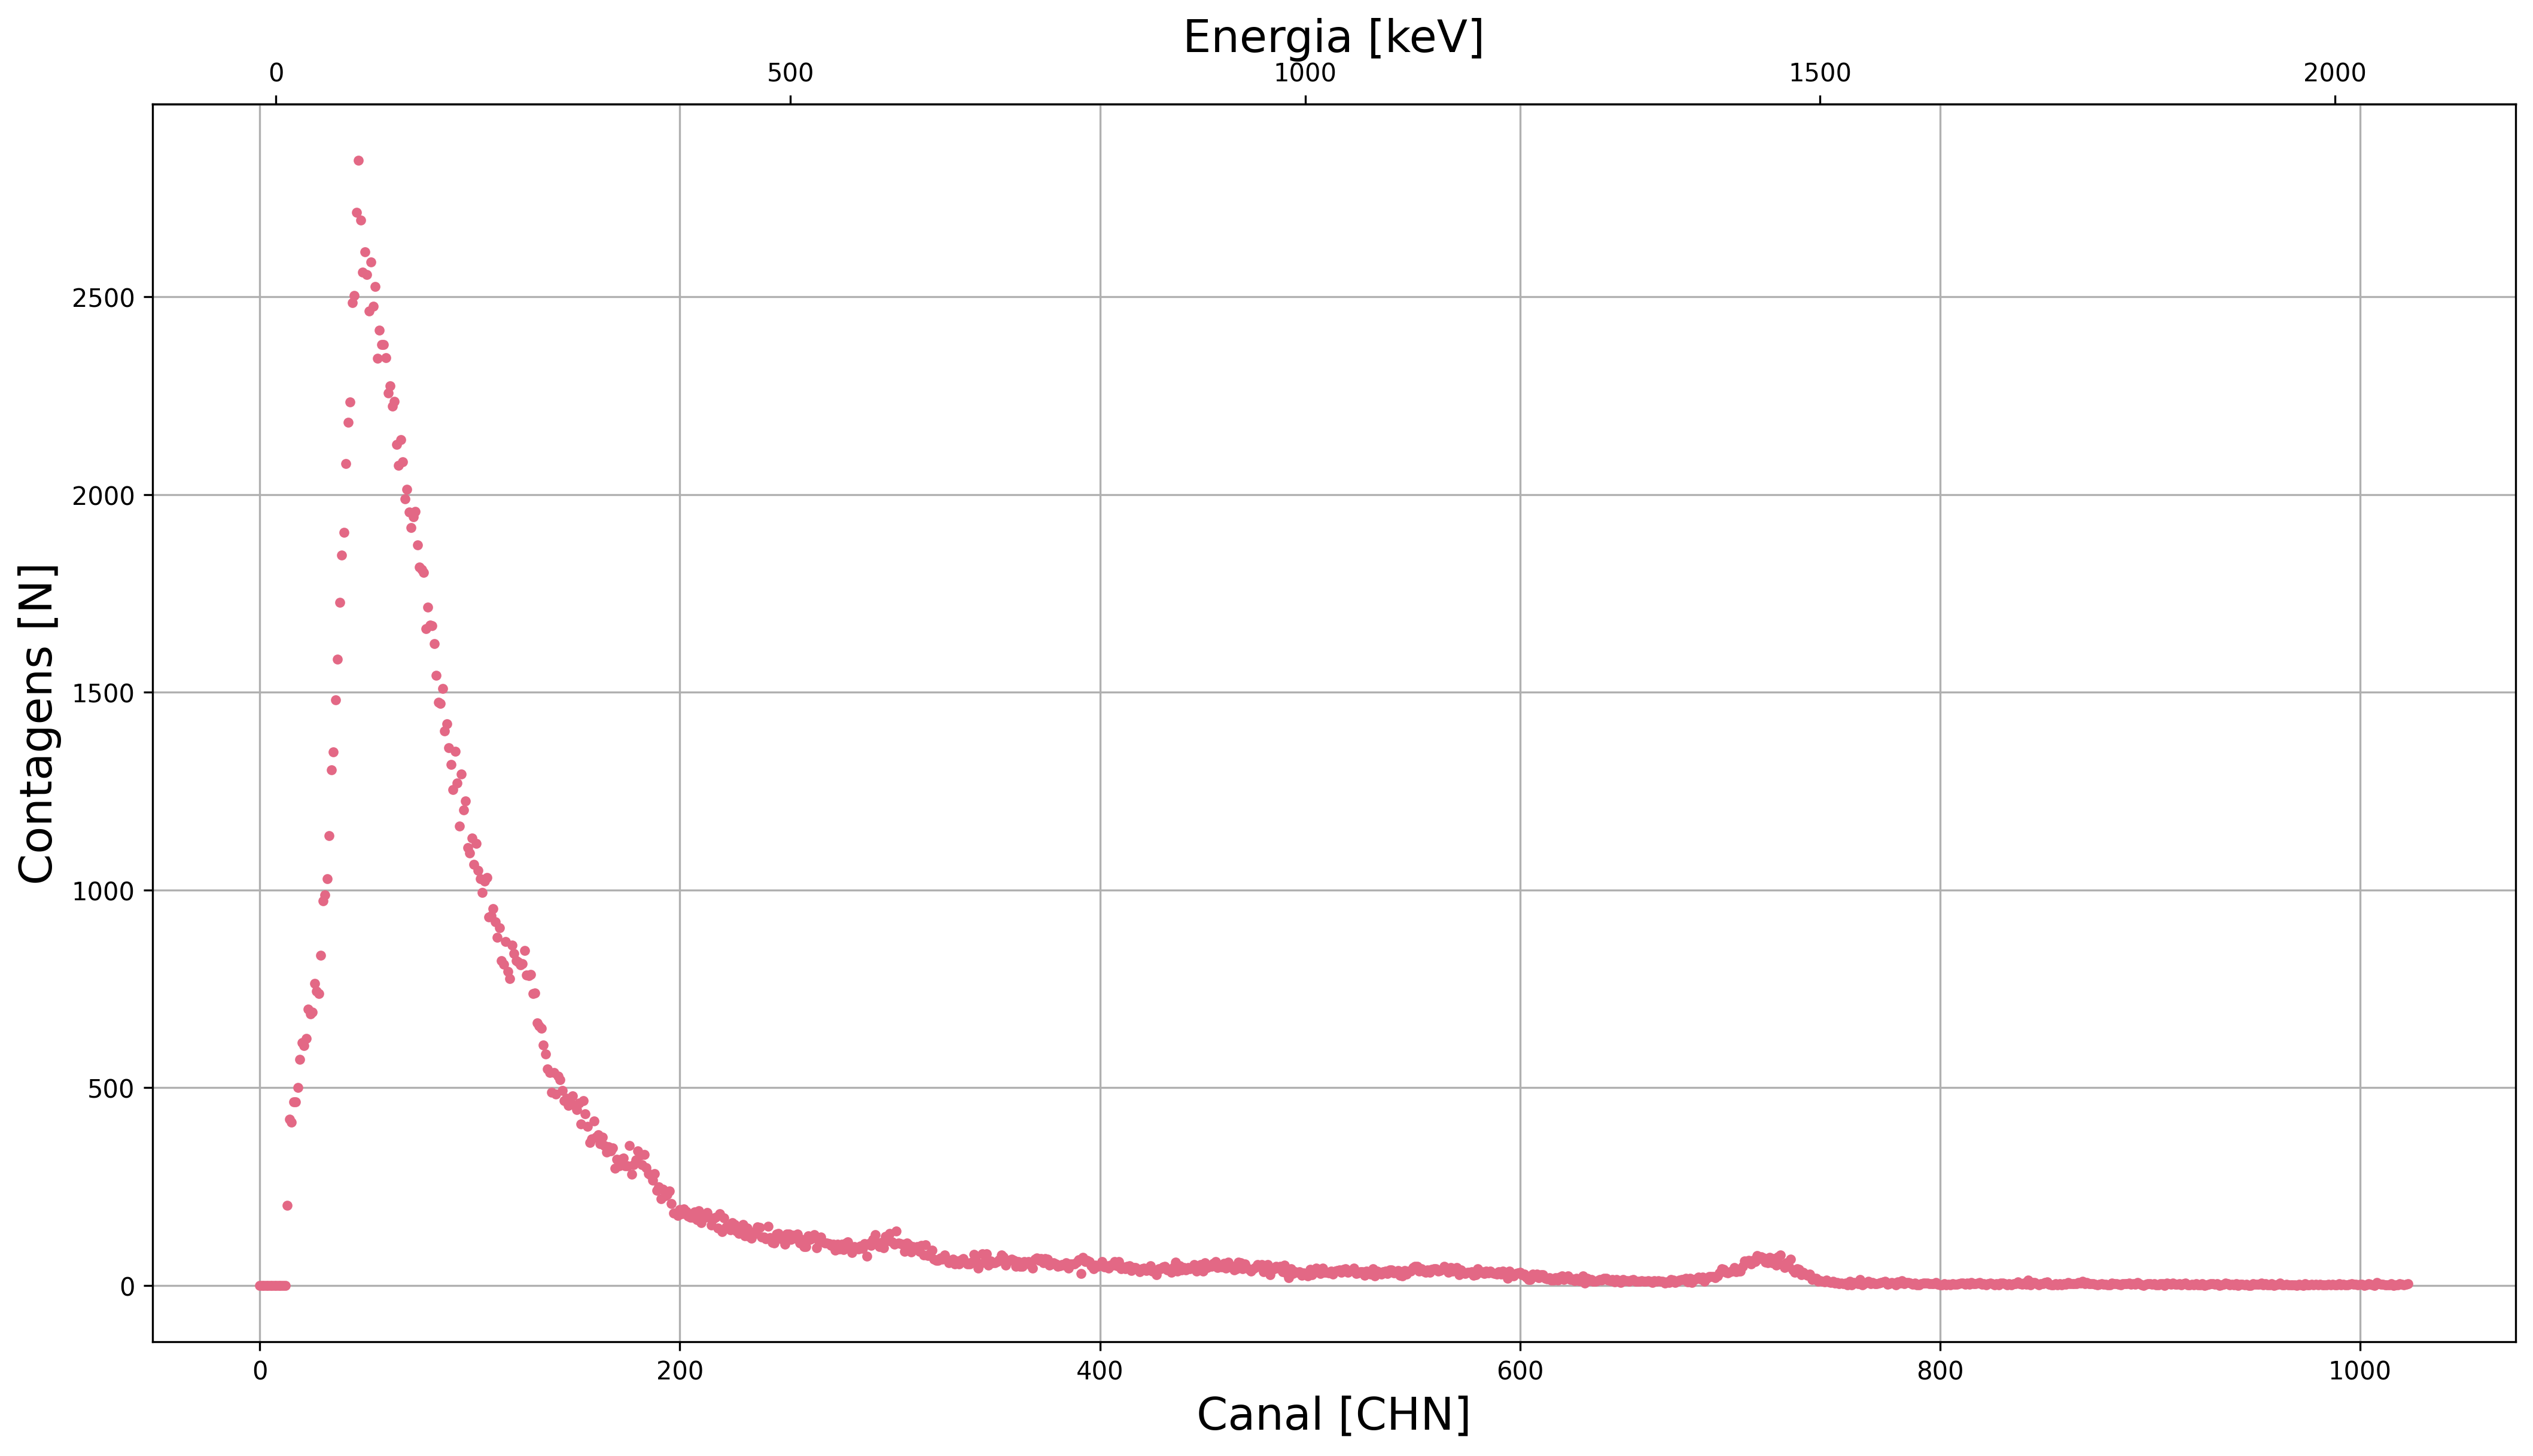

In [20]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(14, 8), dpi=300,facecolor='white')
data = pd.read_csv("../g2_fundo.txt", index_col=False, header=None, sep=",")
x = data.iloc[0:, 0]
y = data.iloc[0:, 1]
ax.plot(x, y, marker='.', c="#e36885", linestyle ='')
ax.set_xlabel('Canal [CHN]', fontsize = 18)
ax.set_ylabel('Contagens [N]', fontsize = 18)
ax.grid()
secax = ax.secondary_xaxis('top', functions=(lambda x: x*2.04-15.54, lambda x: x*2.04-15.54))
secax.set_xlabel('Energia [keV]',fontsize = 18)
plt.show()

In [21]:
def graficoduplo(file, xax, yax, xax2):
    fig, ax = plt.subplots(constrained_layout=True, figsize=(14, 8), dpi=300,facecolor='white')
    data = pd.read_csv(file, index_col=False, header=None, sep=",")
    x = data.iloc[0:, 0]
    y = data.iloc[0:, 1]
    ax.plot(x, y, marker='.', c="#e36885", linestyle ='')
    ax.set_xlabel(xax, fontsize = 18)
    ax.set_ylabel(yax, fontsize = 18)
    ax.grid()
    secax = ax.secondary_xaxis('top', functions=(lambda x: x*2.04-15.54, lambda x: x*2.04-15.54))
    secax.set_xlabel(xax2,fontsize = 18)
    plt.show()
    #ax.set_title('Radiação de Fundo', fontsize = 18)



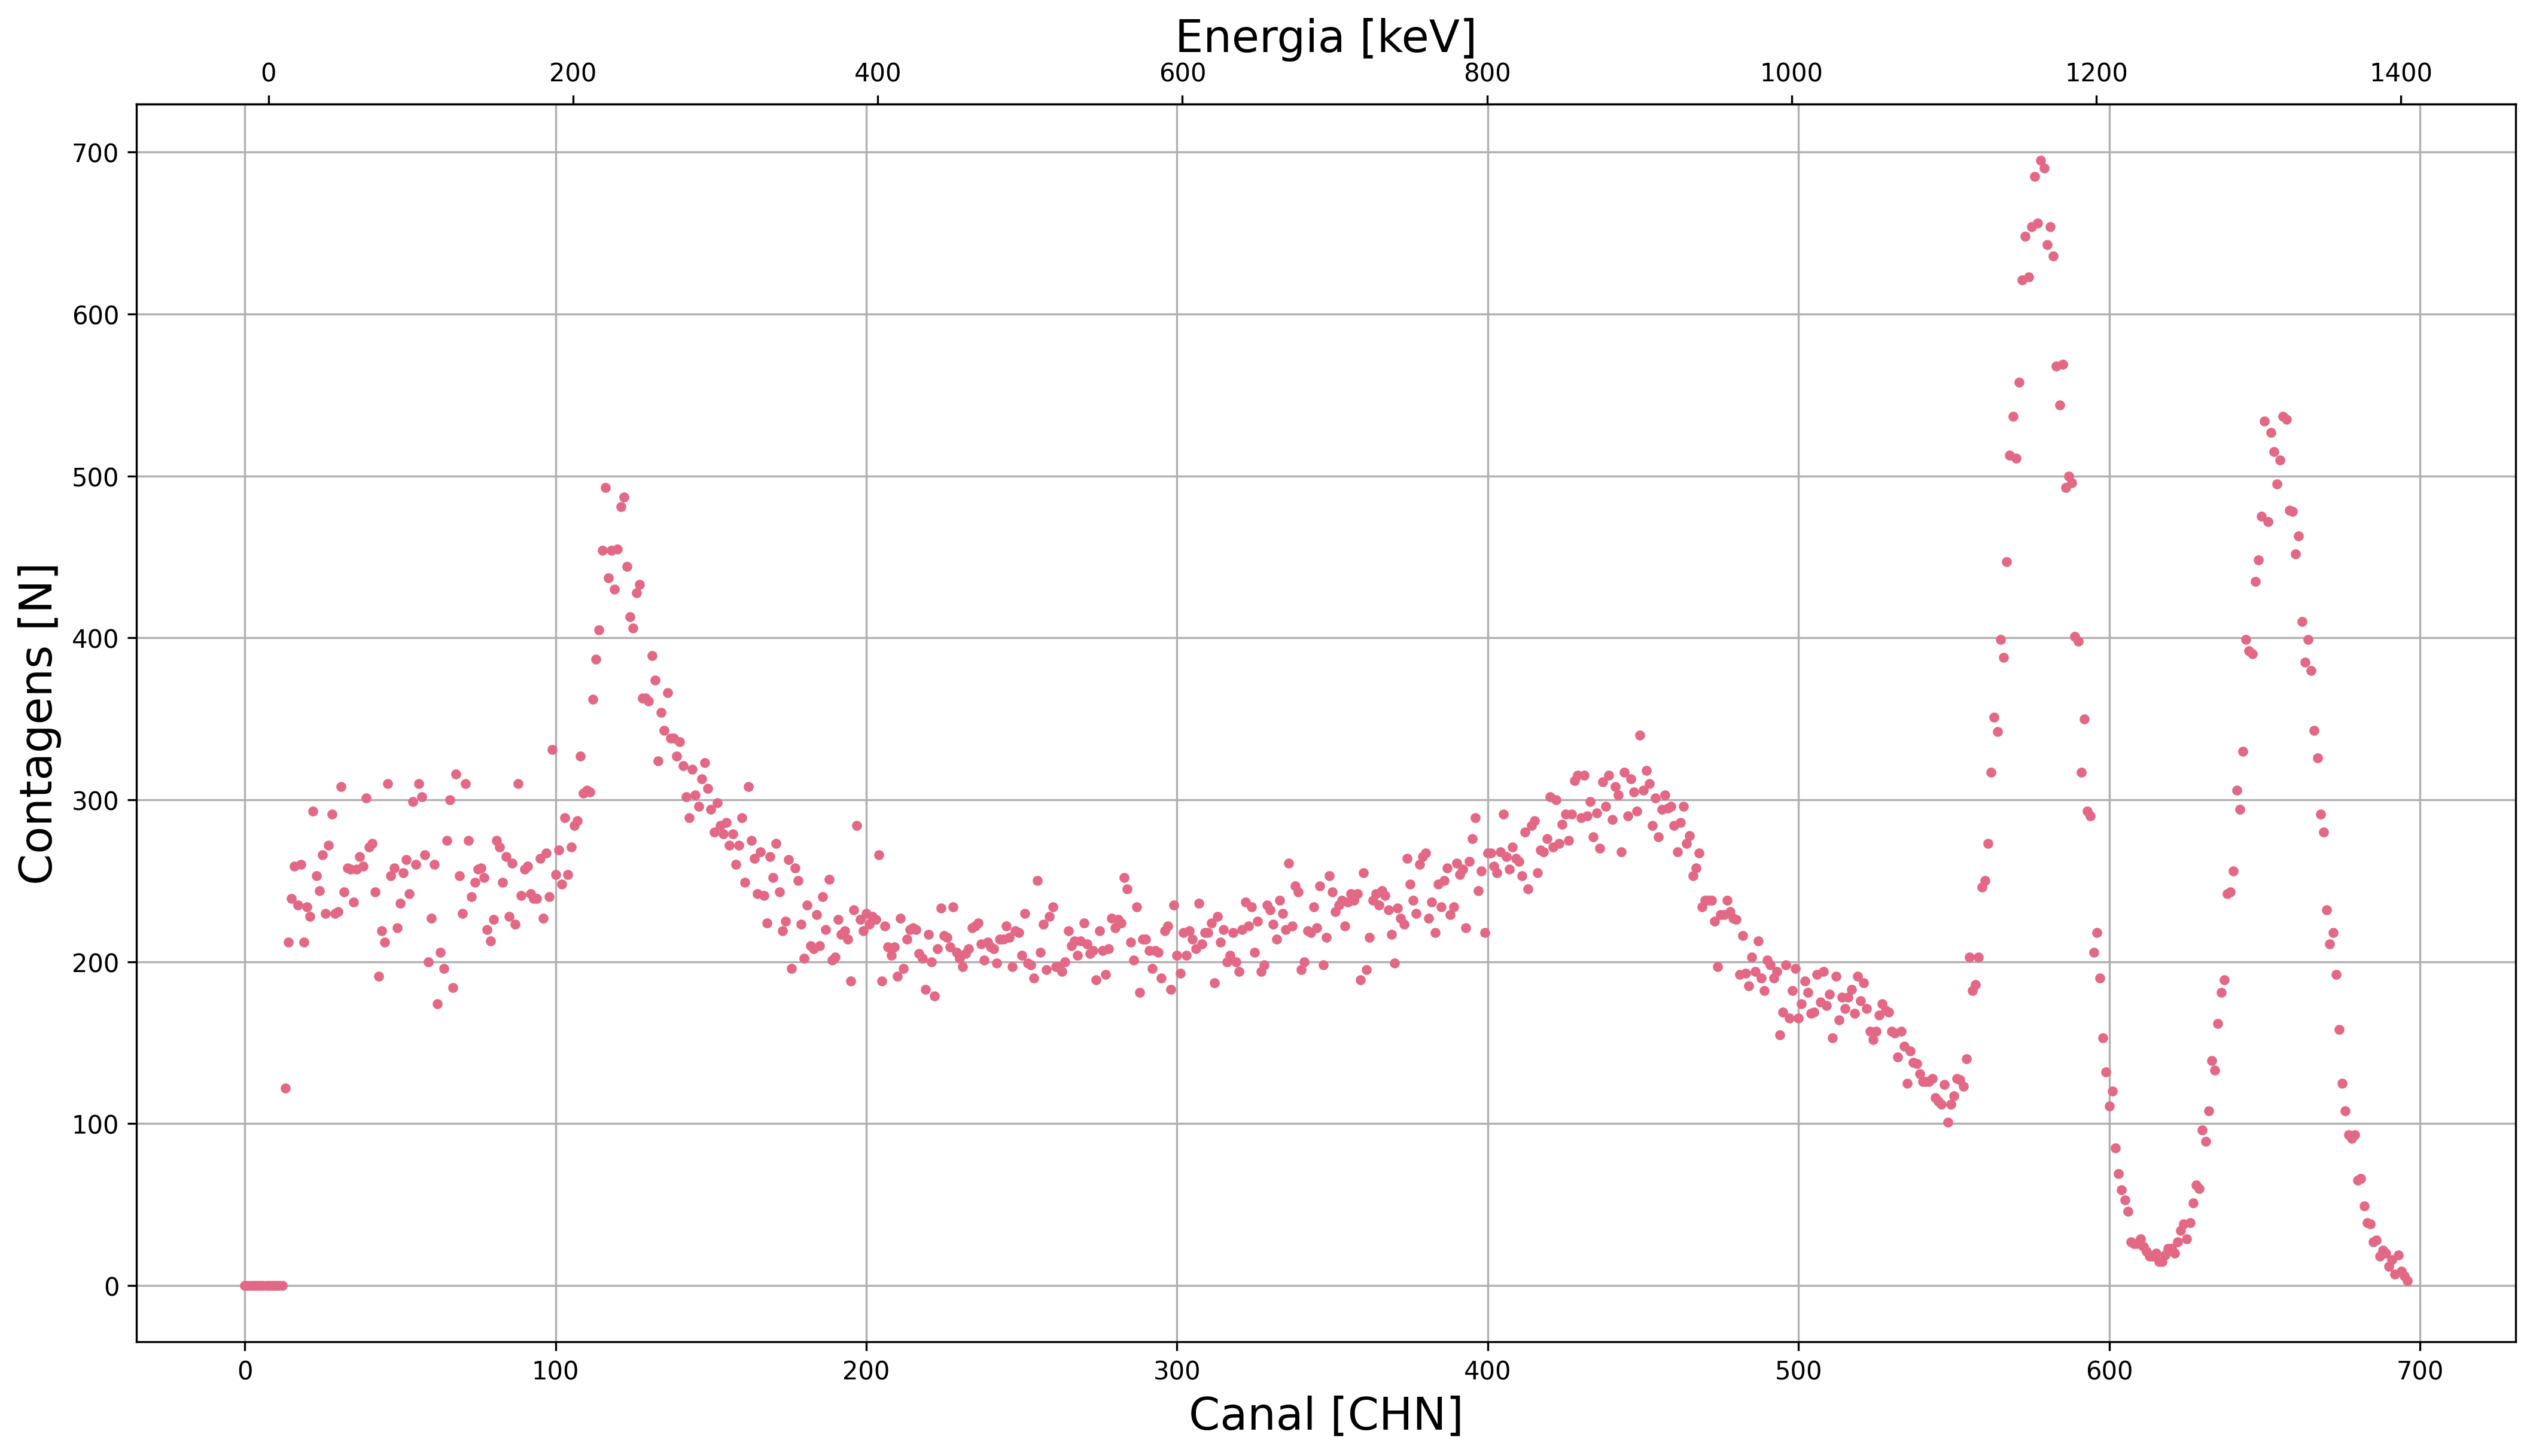

In [22]:
graficoduplo("../cosemfundo.txt", "Canal [CHN]", "Contagens [N]", "Energia [keV]")


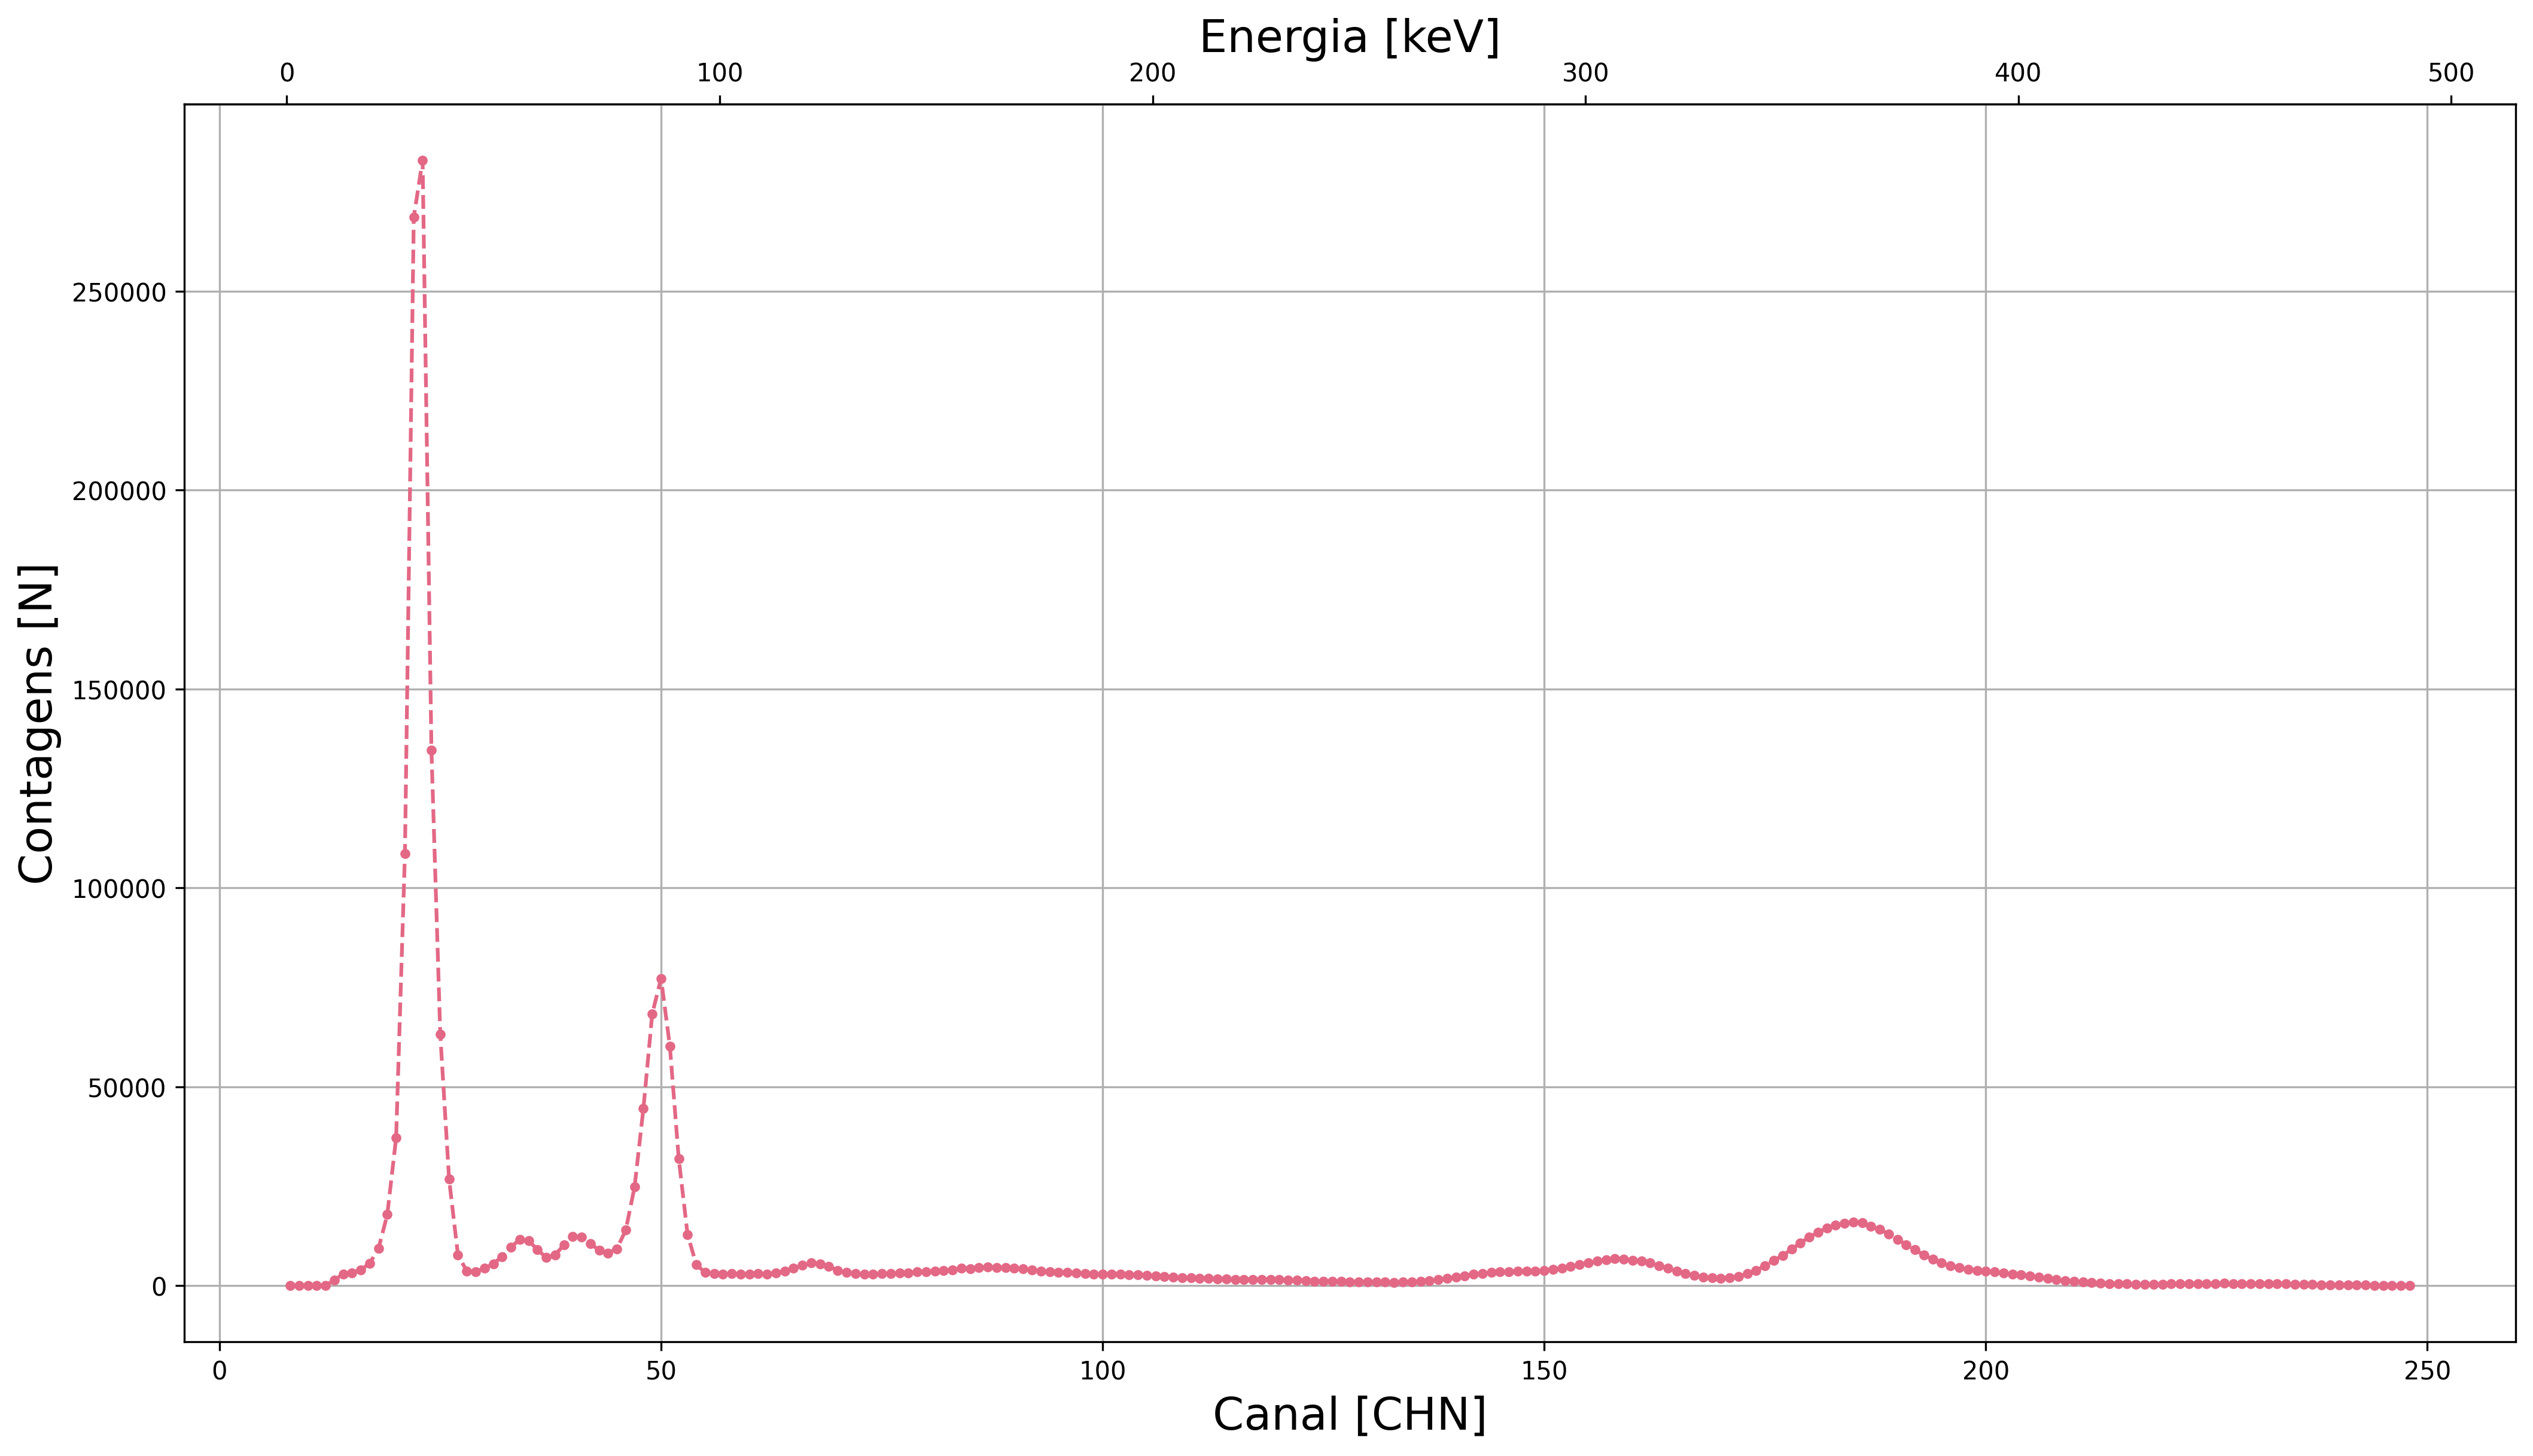

In [23]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(14, 8), dpi=300,facecolor='white')
data = pd.read_csv("../lar10.txt", index_col=False, header=None, sep=",")
x = data.iloc[8:249, 0]
y = data.iloc[8:249, 1]
ax.plot(x, y, marker='.', c="#e36885", linestyle ='--')
ax.set_xlabel('Canal [CHN]', fontsize = 18)
ax.set_ylabel('Contagens [N]', fontsize = 18)
ax.grid()
secax = ax.secondary_xaxis('top', functions=(lambda x: x*2.04-15.54, lambda x: x*2.04-15.54))
secax.set_xlabel('Energia [keV]',fontsize = 18)
plt.show()

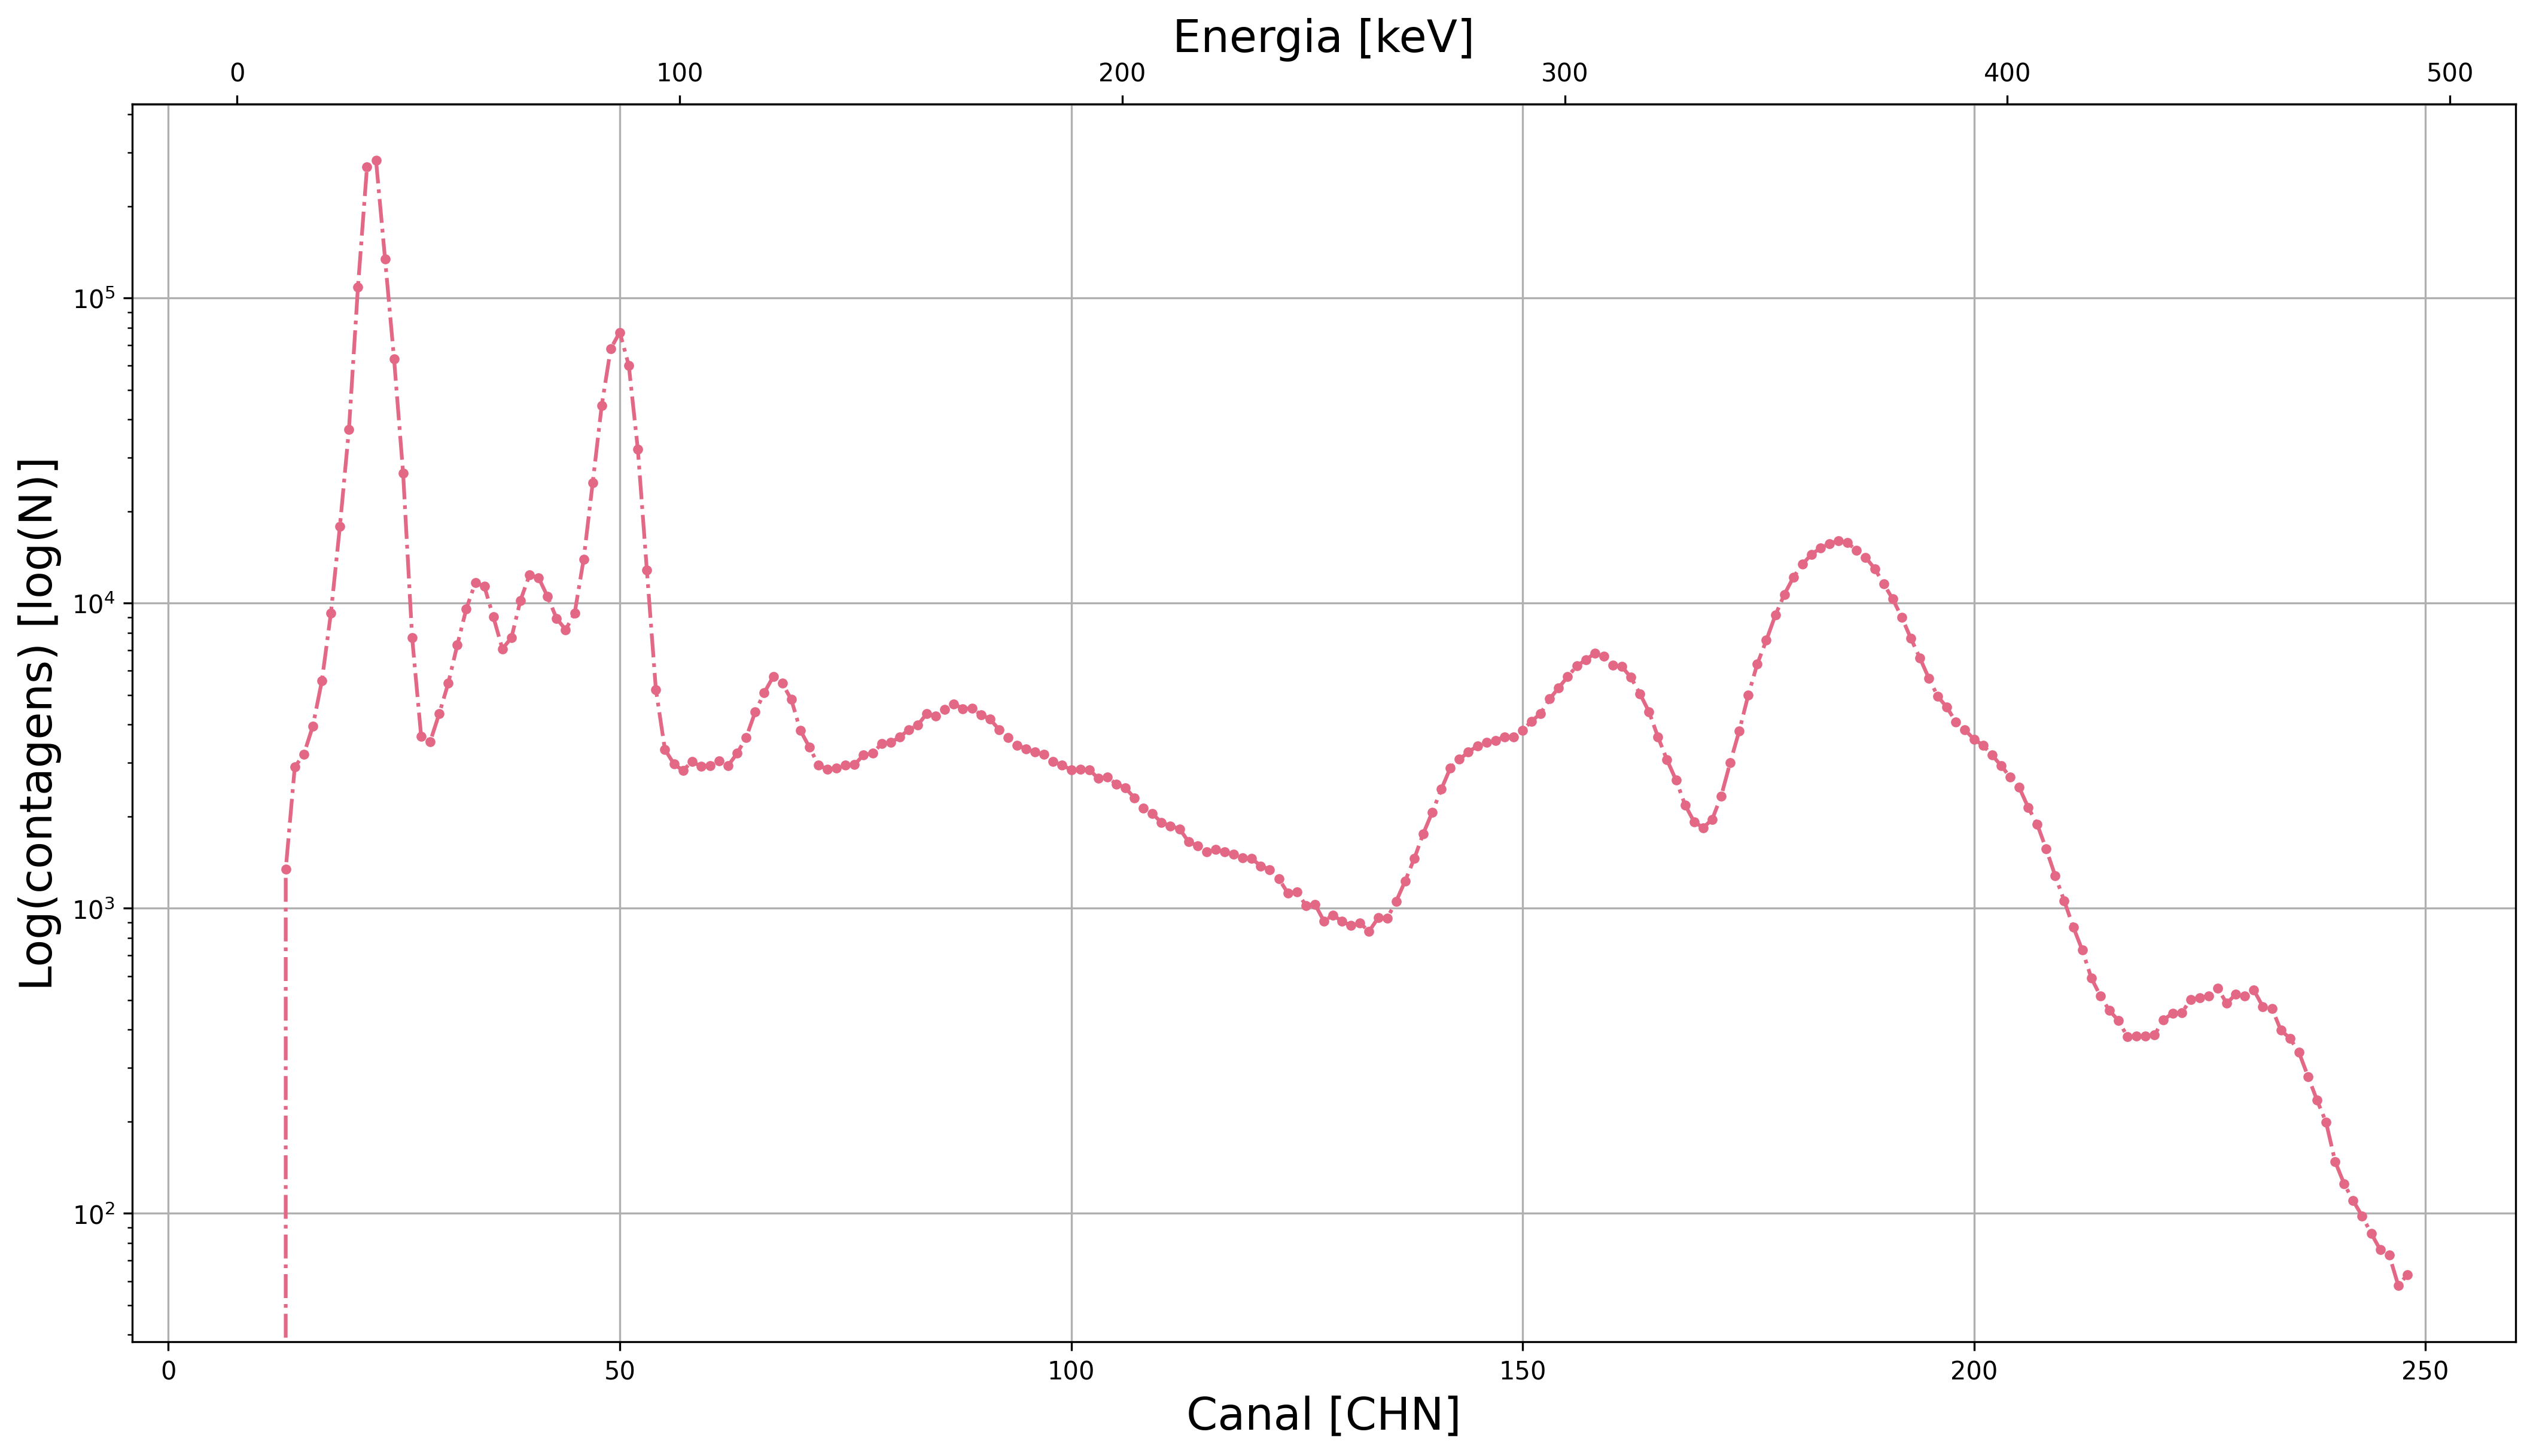

In [24]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(14, 8), dpi=300,facecolor='white')
data = pd.read_csv("../lar10.txt", index_col=False, header=None, sep=",")
x = data.iloc[8:249, 0]
y = data.iloc[8:249, 1]
ax.plot(x, y, marker='.', c="#e36885", linestyle ='-.')
ax.set_yscale("log")
ax.set_xlabel('Canal [CHN]', fontsize = 18)
ax.set_ylabel('Log(contagens) [log(N)]', fontsize = 18)
ax.grid()
secax = ax.secondary_xaxis('top', functions=(lambda x: x*2.04-15.54, lambda x: x*2.04-15.54))
secax.set_xlabel('Energia [keV]',fontsize = 18)
plt.show()

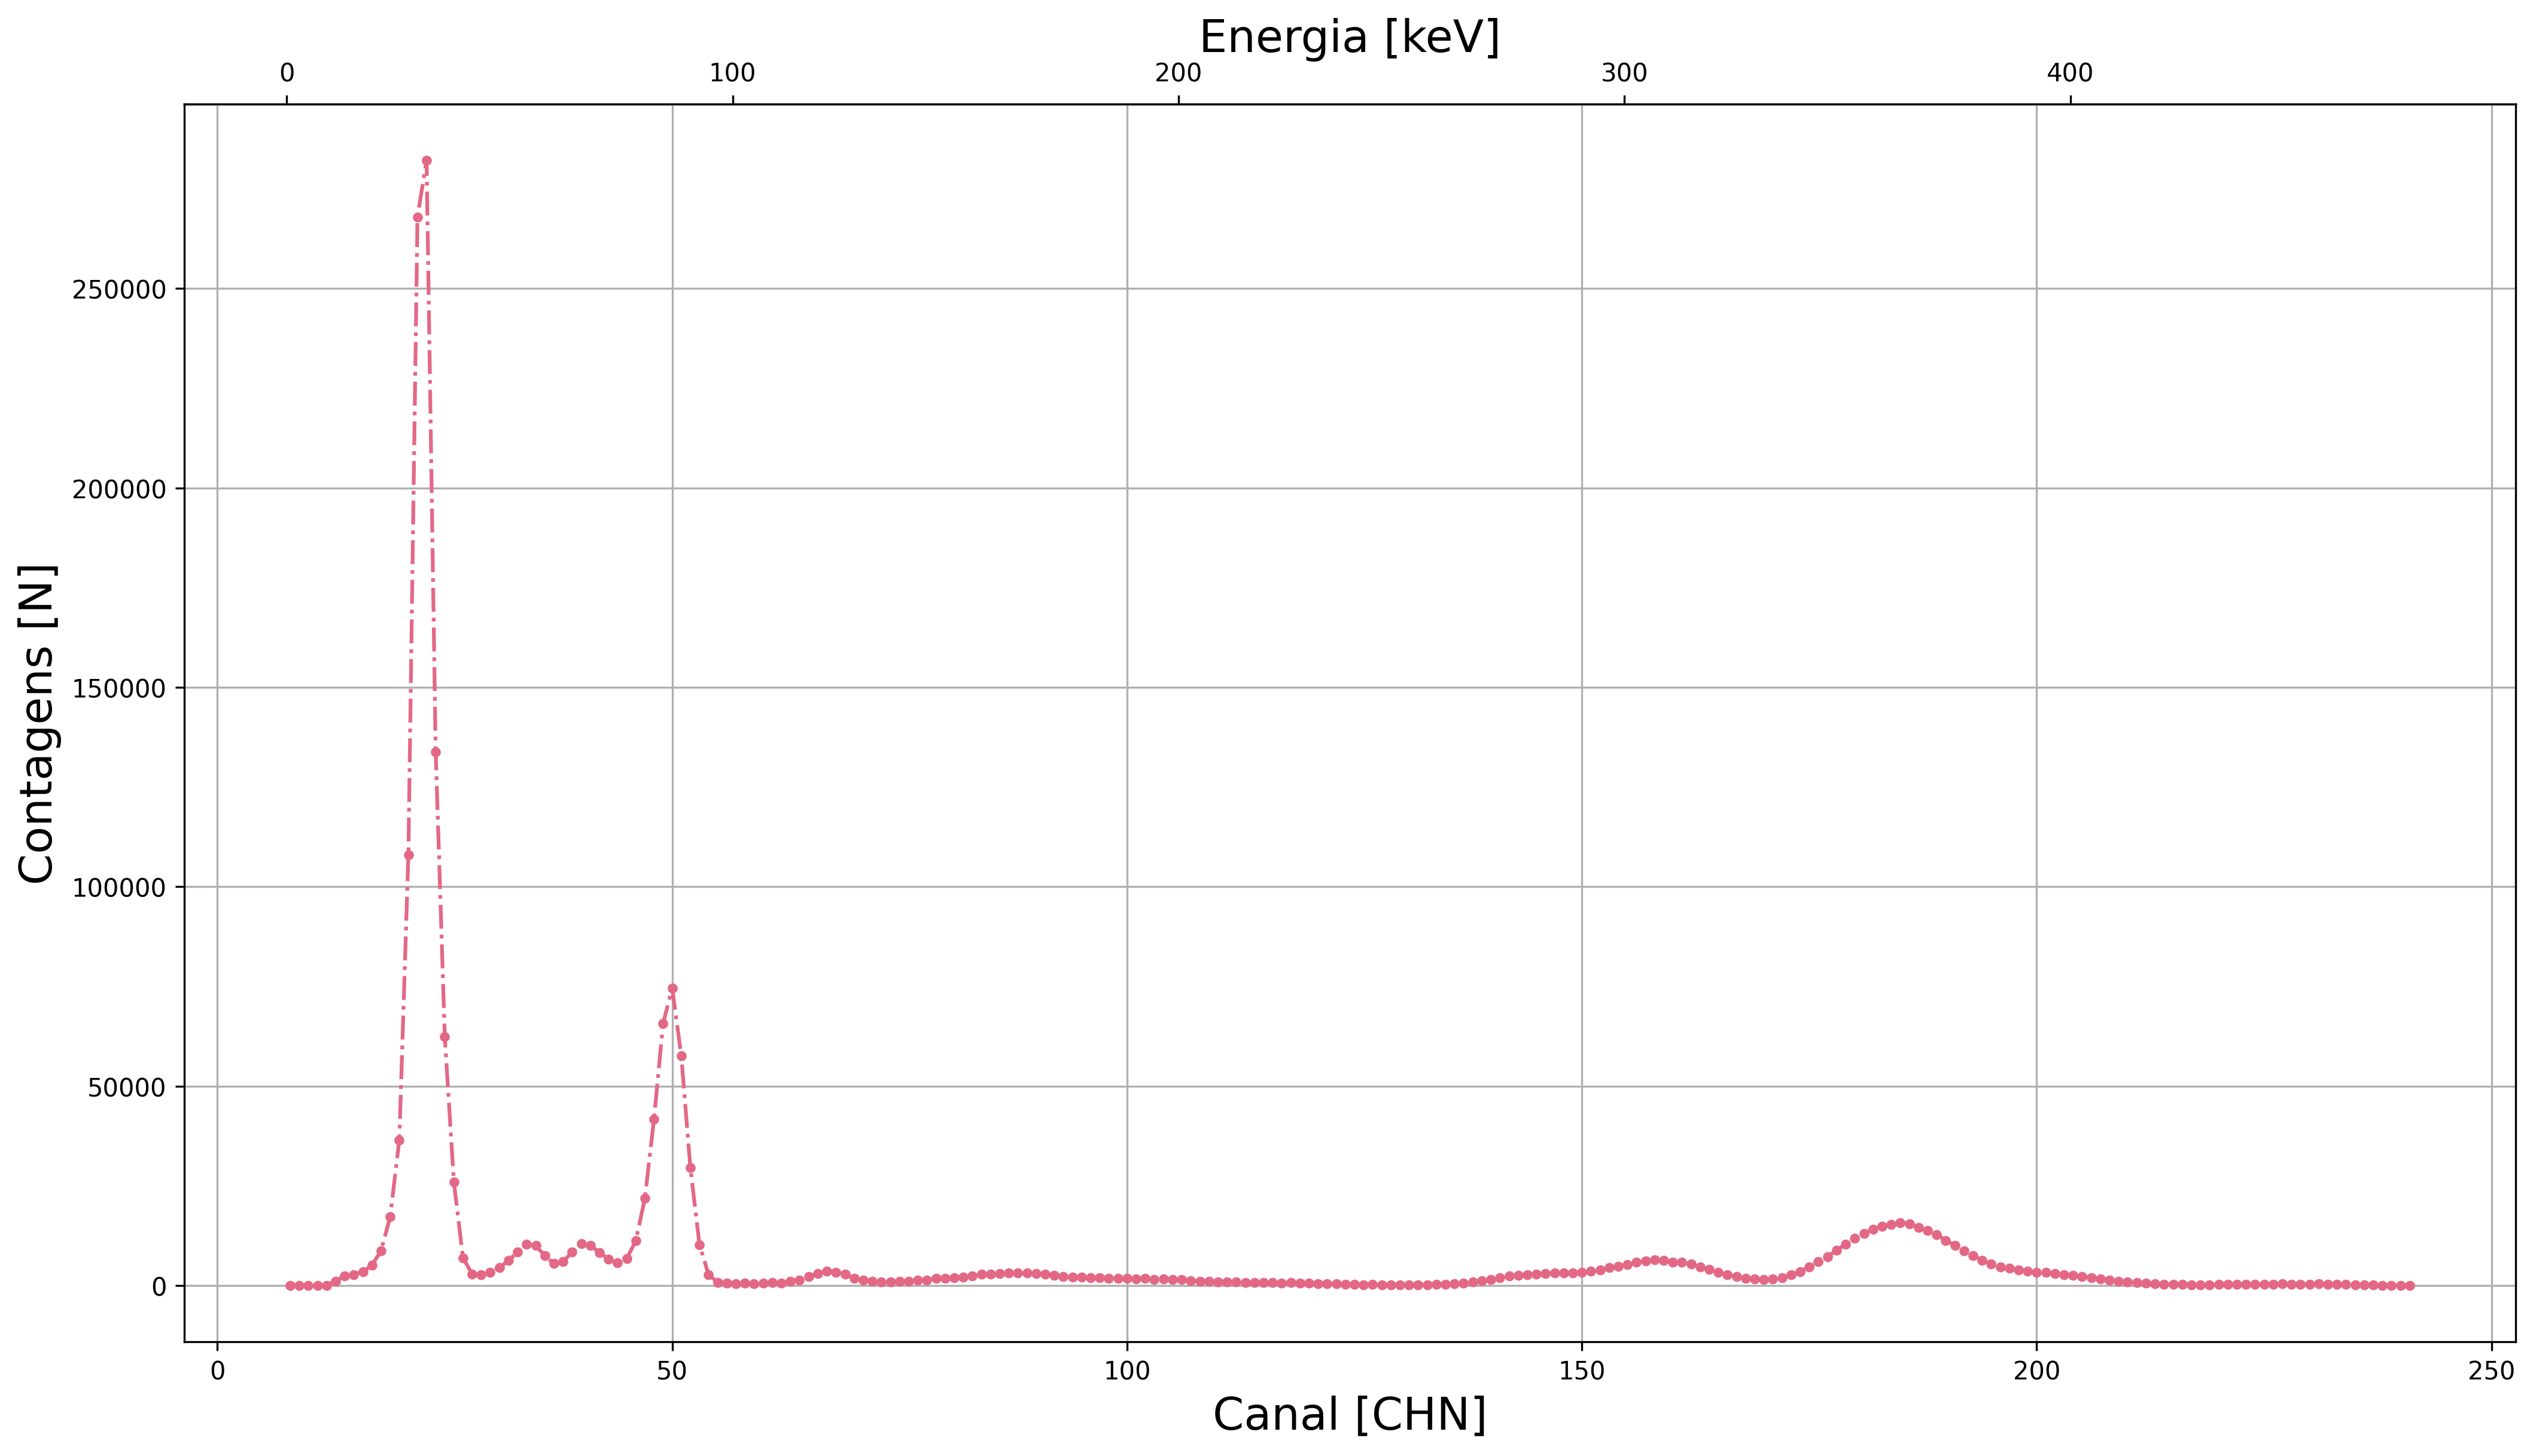

In [25]:
fig, ax = plt.subplots(constrained_layout=True, figsize=(14, 8), dpi=300,facecolor='white')
data = pd.read_csv("../laranja_sem_fundo.txt", index_col=False, header=None, sep=",")
x = data.iloc[8:, 0]
y = data.iloc[8:, 1]
ax.plot(x, y, marker='.', c="#e36885", linestyle ='-.')
#ax.set_yscale("log")
ax.set_xlabel('Canal [CHN]', fontsize = 18)
ax.set_ylabel('Contagens [N]', fontsize = 18)
ax.grid()
secax = ax.secondary_xaxis('top', functions=(lambda x: x*2.04-15.54, lambda x: x*2.04-15.54))
secax.set_xlabel('Energia [keV]',fontsize = 18)
plt.show()

In [26]:
def calib_prop(centroid, sigma, counts):
    err = sigma/(math.sqrt(counts))
    print(err)
    print (math.sqrt(2.04*2.04*err*err + centroid*centroid*0.0000744*0.0000744 + 0.00468*0.00468))


In [27]:
#print(calib(714.6))
#calib_prop(714.6, 15.5, 2542)

calib_prop(458.5, 35.62, 2570)
calib(458.5)

0.702631075327276
1.4337808910232177


919.8000000000001

In [28]:
2.04*119.4-15.54

228.03600000000003